# Linear Regression on Worlds Winrate

For my project, I wanted to do something related to League of Legends as it is one of my favorite games to watch and play. Worlds is the final event of the professional League season, and it concluded on November 2nd, 2024. With all of the data from Worlds 2024 out, I want to look back and analyze all the factors that determined a teams win/loss.

Dataset from: https://www.kaggle.com/datasets/anmatngu/league-of-legends-worlds-2024-swiss-stage-stats

First, I import all the libraries that I will need

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

### Reading data + cleaning

In [2]:
# Read dataset
df = pd.read_csv('champions.csv', sep=',')

# Drop irrelevant columns and rows with missing values
df = df.drop(columns=['Presence','Picks', 'Bans', 'Wins', 'Losses', 'Avg BT'])
df.replace('-', np.nan, inplace=True)
df.dropna(inplace=True)
champion_names = df['Champion'] #Saving champ names
df = df.drop(columns=['Champion']) #Dropping before regression

# Convert winrate to float
df['Winrate'] = df['Winrate'].str.replace('%', '').astype(float)

# Drop rows where the champion's winrate is NaN
df = df.dropna(subset=['Winrate'])

# Print the cleaned data shape
print(df.shape)

(83, 9)


### Features

I remove lots of features, but I keep the champion, their kill death ratio, creep score, gold per minute, creep score at 15, gold difference at 15 and xp difference at 15. These have the biggest impact on whether or not a game is winnable for a certain team.

In [3]:

features = df[['KDA', 'CSM', 'DPM', 'GPM', 'CSD@15', 'GD@15', 'XPD@15']]
target = df['Winrate']  # Predicting the winrate as a continuous variable

# Check if any values are missing in the feature columns (should be 0 since i already cleaned the data)
print(features.isna().sum())

KDA       0
CSM       0
DPM       0
GPM       0
CSD@15    0
GD@15     0
XPD@15    0
dtype: int64


### Train/Test Split

In [4]:
# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=1234)

# Check the shapes of the train and test sets
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(66, 7) (17, 7) (66,) (17,)


### Feature Scaling

In [5]:
# Initialize a StandardScaler
scaler = StandardScaler()

# Fit and transform the training data
X_train_scaled = scaler.fit_transform(X_train)

# Only transform the test data
X_test_scaled = scaler.transform(X_test)

### Train Linear Regression Model

In [6]:
# Initialize the Linear Regression model
model = LinearRegression()

# Train the model
model.fit(X_train_scaled, y_train)

# Print the coefficients and intercept
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

Coefficients: [ 15.59285418 -14.41654832 -13.68656682  25.98312948   0.4661841
   7.0314098   -3.45535563]
Intercept: 42.68181818181817


### Predict and Evaluate the Model

      Champion  Actual Winrate  Predicted Winrate
74     Morgana             0.0          33.124556
52       Yasuo            50.0          29.314860
71       Jayce            50.0          31.575555
62        Nunu           100.0          75.889764
35    Tristana            38.0          38.472353
75        Ryze           100.0          65.972315
33      Lucian             0.0          23.157950
66       Viego            50.0          33.865787
10      Ezreal            55.0          35.051033
64  Tahm Kench             0.0          72.145653
69       Elise           100.0          76.250270
21        Jhin            28.0          41.756424
56      Twitch            33.0          27.745309
4         Ashe            72.0          60.387428
47      Draven            33.0          24.690301
27      Ksante            45.0          34.366384
40     Leblanc           100.0          46.930237
Mean Squared Error: 818.6951969521814
R-squared: 0.2765852801923159


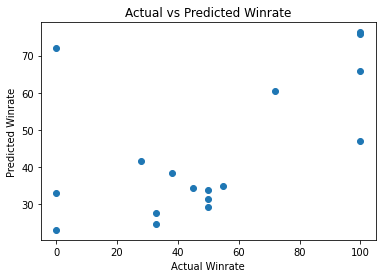

In [7]:
# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Evaluate the model using Mean Squared Error and R-squared
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

test_champions = champion_names.iloc[X_test.index].values
results = pd.DataFrame({
    'Champion': test_champions,
    'Actual Winrate': y_test,
    'Predicted Winrate': y_pred
})

# Display the results
print(results)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

# Plot the predicted vs. actual values
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Winrate')
plt.ylabel('Predicted Winrate')
plt.title('Actual vs Predicted Winrate')
plt.show()

### Why the variance?

I believe the variance comes from champions with a low play rate, as the lower the playrate is for a champion, the more one player can skew the results. Additionally, some champions are only good in hyper specific scenarios, hence their actual winrate being higher/lower than it is.

### Predict a New Champions Stats

In [8]:
new_data = pd.DataFrame({
    'KDA': [4.5],
    'CSM': [7.5],
    'DPM': [550],
    'GPM': [400],
    'CSD@15': [5.0],
    'GD@15': [150],
    'XPD@15': [200]
})

# Scale the new data using the same scaler
new_data_scaled = scaler.transform(new_data)

# Predict winrate for the new data
new_pred = model.predict(new_data_scaled)
print(f'Predicted Winrate: {new_pred[0]}')

Predicted Winrate: 49.58505211446955
